# Transportation Problem

__Transportation problem__ is a special kind of __Linear Programming Problem (LPP)__ in which goods are transported from a set of sources to a set of destinations subject to the supply and demand of the sources and destination respectively such that the total cost of transportation is minimized. It is also sometimes called as Hitchcock problem.

__Types of Transportation problems:__
- __Balanced__: When both supplies and demands are equal then the problem is said to be a balanced transportation problem.

- __Unbalanced__: When the supply and demand are not equal then it is said to be an unbalanced transportation problem. In this type of problem, either a dummy row or a dummy column is added according to the requirement to make it a balanced problem. Then it can be solved similar to the balanced problem.

__Methods to Solve__:
To find the initial basic feasible solution there are three methods:

1. NorthWest Corner Cell Method.
2. Least Call Cell Method.
3. Vogel’s Approximation Method (VAM).

__Basic structure of transportation problem__:

![Alt text](T16.png)

In the above table __D1__, __D2__, __D3__ and __D4__ are the destinations where the products/goods are to be delivered from different sources __S1__, __S2__, __S3__ and __S4__. $S_i$ is the supply from the source $O_i$. $d_j$ is the demand of the destination $D_j$. $C_{ij}$ is the cost when the product is delivered from source $S_i$ to destination $D_j$.

# NorthWest Corner Method

In [1]:
import copy

grid = [[3, 1, 7, 4], [2, 6, 5, 9], [8, 3, 3, 2]]  # table
supply = [300, 400, 500]  # supply
demand = [250, 350, 400, 200]  # demand


In [2]:
import tracemalloc


In [3]:
def northwest_corner(g, s, d):
    # делаем копии данных, чтобы не изменять изначальные
    grid = copy.deepcopy(g)
    supply = list(s)
    demand = list(d)

    startR = 0  # стартовая строка
    startC = 0  # стартовая колонка
    ans = 0
    # цикл выполняется до тех пор, пока не достигнет правого нижнего угла
    counter = 0

    tracemalloc.start()

    while (startR != len(grid) and startC != len(grid[0])):
        counter += 1
        # если спрос превышает предложение
        if (supply[startR] <= demand[startC]):
            ans += supply[startR] * grid[startR][startC]
            # вычесть величину предложения из величины спроса
            demand[startC] -= supply[startR]
            startR += 1
        # если предложение превышает спрос
        else:
            ans += demand[startC] * grid[startR][startC]
            # вычесть величину спроса из величины предложения
            supply[startR] -= demand[startC]
            startC += 1
    max_mem = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()
    return ans, counter, max_mem


ans, loop_count, _ = northwest_corner(grid, supply, demand)
print("The initial feasible basic solution is", ans, "in", loop_count, "loops")


The initial feasible basic solution is 4400 in 6 loops


# Least Cost Cell Method

In [4]:
def least_cost_cell(g, s, d):
    # делаем копии данных, чтобы не изменять изначальные
    grid = copy.deepcopy(g)
    supply = list(s)
    demand = list(d)

    # вычеркнутые строки и столбцы
    visited_rows = []
    visited_cols = []

    ans = 0

    # переменные для нахождения минимальной ячейки
    least_row = 0
    least_col = 0
    least_cell = grid[0][0]
    counter = 0
    loop_counter = 0
    # в цикле пока спрос и предлодение не станут равны 0

    tracemalloc.start()

    while (sum(supply) + sum(demand) != 0):
        counter += 1
        loop_counter += 1
        if counter > 1000:
            ans = 0
            break
        # проходим по таблице и ищем минимальную ячейку
        for i in range(len(grid)):
            loop_counter += 1
            # исключая вычеркнутые строки
            if i in visited_rows:
                continue
            for j in range(len(grid[0])):
                loop_counter += 1
                # и столбцы
                if j in visited_cols:
                    continue

                cell = grid[i][j]
                if cell < least_cell:
                    least_cell = cell
                    least_row = i
                    least_col = j

        # записываем данные минимальной ячейки
        supply_val = supply[least_row]
        demand_val = demand[least_col]
        min_val = min(supply_val, demand_val)

        # сразу прибавляем в ответ
        ans += grid[least_row][least_col] * min_val

        # записываем данные в таблицу
        grid[least_row][least_col] = min_val
        supply[least_row] -= min_val
        demand[least_col] -= min_val

        # вычеркиваем строку или столбец если предложение или спрос занулились
        if supply[least_row] == 0:
            visited_rows.append(least_row)
        else:
            visited_cols.append(least_col)

        least_cell = min_val

    max_mem = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()
    return ans, loop_counter, max_mem


ans, loop_count, _ = least_cost_cell(grid, supply, demand)
print("The initial feasible basic solution is", ans, "in", loop_count, "loops")


The initial feasible basic solution is 2850 in 72 loops


# Vogel’s Approximation Method

In [9]:
def vogels_approximation(g, s, d):
    grid = copy.deepcopy(g)
    supply = list(s)
    demand = list(d)

    INF = 10**3
    n = len(grid)
    m = len(grid[0])
    ans = 0

    loop_counter = 0

    # вспомогательная функция для нахождения разности строк и разности столбцов
    def findDiff(grid):
        t = 0
        rowDiff = []
        colDiff = []
        for i in range(len(grid)):
            t += 1

            arr = grid[i][:]
            arr.sort()
            rowDiff.append(arr[1]-arr[0])
        col = 0
        while col < len(grid[0]):
            t += 1

            arr = []
            for i in range(len(grid)):
                t += 1
                arr.append(grid[i][col])
            arr.sort()
            col += 1
            colDiff.append(arr[1]-arr[0])
        return rowDiff, colDiff, t

    # цикл выполняется до тех пор, пока спрос и предложение не будут исчерпаны
    counter = 0

    tracemalloc.start()

    while max(supply) != 0 or max(demand) != 0:
        counter += 1
        loop_counter += 1
        if counter > 500:
            return 0, 0
        # нахождение разности строк и столбцов
        row, col, t = findDiff(grid)
        loop_counter += t
        # нахождение максимального элемента в массиве разности строк
        maxi1 = max(row)
        # нахождение максимального элемента в массиве разностей столбцов
        maxi2 = max(col)

        # если элемент row diff max больше или равен элементу col diff max
        if (maxi1 >= maxi2):
            for ind, val in enumerate(row):
                loop_counter += 1
                if (val == maxi1):
                    # нахождение минимального элемента в индексе таблицы, где был найден максимум в разности строк
                    mini1 = min(grid[ind])
                    for ind2, val2 in enumerate(grid[ind]):
                        loop_counter += 1
                        if (val2 == mini1):
                            # вычисление минимума спроса и предложения в данной строке и столбце
                            mini2 = min(supply[ind], demand[ind2])
                            ans += mini2 * mini1
                            # вычитание минимума из спроса и предложения
                            supply[ind] -= mini2
                            demand[ind2] -= mini2
                            # если спрос меньше, то всему столбцу присваивается максимальное значение, так что столбец исключается для следующей итерации
                            if (demand[ind2] == 0):
                                for r in range(n):
                                    loop_counter += 1
                                    grid[r][ind2] = INF
                            # если предложение меньше, то всему ряду присваивается максимальное значение, так что ряд исключается для следующей итерации
                            else:
                                grid[ind] = [INF for i in range(m)]
                            break
                    break
        # если элемент row diff max больше элемента col diff max
        else:
            for ind, val in enumerate(col):
                loop_counter += 1
                if (val == maxi2):
                    # нахождение минимального элемента в индексе таблицы, где максимум был найден в разности столбцов
                    mini1 = INF
                    for j in range(n):
                        loop_counter += 1
                        mini1 = min(mini1, grid[j][ind])

                    for ind2 in range(n):
                        loop_counter += 1
                        val2 = grid[ind2][ind]
                        if val2 == mini1:
                            # вычисление минимума спроса и предложения в данной строке и столбце
                            mini2 = min(supply[ind2], demand[ind])
                            ans += mini2 * mini1
                            # вычитание минимума из спроса и предложения
                            supply[ind2] -= mini2
                            demand[ind] -= mini2
                            # если спрос меньше, то всему столбцу присваивается максимальное значение, так что столбец исключается для следующей итерации
                            if (demand[ind] == 0):
                                for r in range(n):
                                    loop_counter += 1
                                    grid[r][ind] = INF
                            # если предложение меньше, то всей строке присваивается максимальное значение, так что строка исключается для следующей итерации
                            else:
                                grid[ind2] = [INF for i in range(m)]
                            break
                    break

    max_mem = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()
    return ans, loop_counter, max_mem


ans, loop_count, _ = vogels_approximation(grid, supply, demand)
print("The initial feasible basic solution is", ans, "in", loop_count, "loops")


ValueError: not enough values to unpack (expected 3, got 2)

# Random transport problem generator and testing

In [6]:
import random


def generate_transport_problem(n, m, cost_lim=15):
    grid = []
    supply = []
    demand = []

    # заполняем массивы спроса и предложения случайными числами
    for i in range(n):
        supply.append(int(random.random() * 20) * 50 + 50)
    for i in range(m):
        demand.append(int(random.random() * 15) * 50 + 50)

    # находим суммы
    sum_supply = sum(supply)
    sum_demand = sum(demand)

    # если сумма спроса получилась больше суммы предложения
    if (sum_demand > sum_supply):
        # находим разницу, которую нужно прибавить
        diff = sum_demand - sum_supply
        part = int(diff / n)
        rem = diff - part * n
        # и прибавляем в цикле
        for i in range(n):
            supply[i] += part
        supply[0] += rem
    # аналогично, если предложение больше спроса
    else:
        diff = sum_supply - sum_demand
        part = int(diff / m)
        rem = diff - part * m

        for i in range(m):
            demand[i] += part
        demand[0] += rem

    # print(supply, sum(supply))
    # print(demand, sum(demand))

    # заполняем таблицу случайными стоимостями
    for i in range(n):
        grid.append([])
        for j in range(m):
            grid[i].append(int(random.random() * cost_lim + 1))
    # print(grid)
    return grid, supply, demand


generate_transport_problem(5, 10)


([[1, 9, 9, 8, 3, 3, 4, 9, 9, 6],
  [3, 6, 14, 8, 14, 9, 9, 9, 8, 1],
  [3, 2, 2, 5, 13, 9, 10, 6, 5, 2],
  [15, 13, 6, 4, 10, 10, 7, 6, 15, 9],
  [7, 7, 9, 1, 2, 15, 9, 7, 1, 11]],
 [570, 870, 270, 820, 570],
 [350, 350, 600, 250, 300, 500, 250, 150, 50, 300])

In [38]:
grid, supply, demand = generate_transport_problem(4, 5, cost_lim=10)

print(northwest_corner(grid, supply, demand))
print(least_cost_cell(grid, supply, demand))
print(vogels_approximation(grid, supply, demand))


(18048, 8, 168)
(11802, 135, 288)
(11924, 316, 856)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


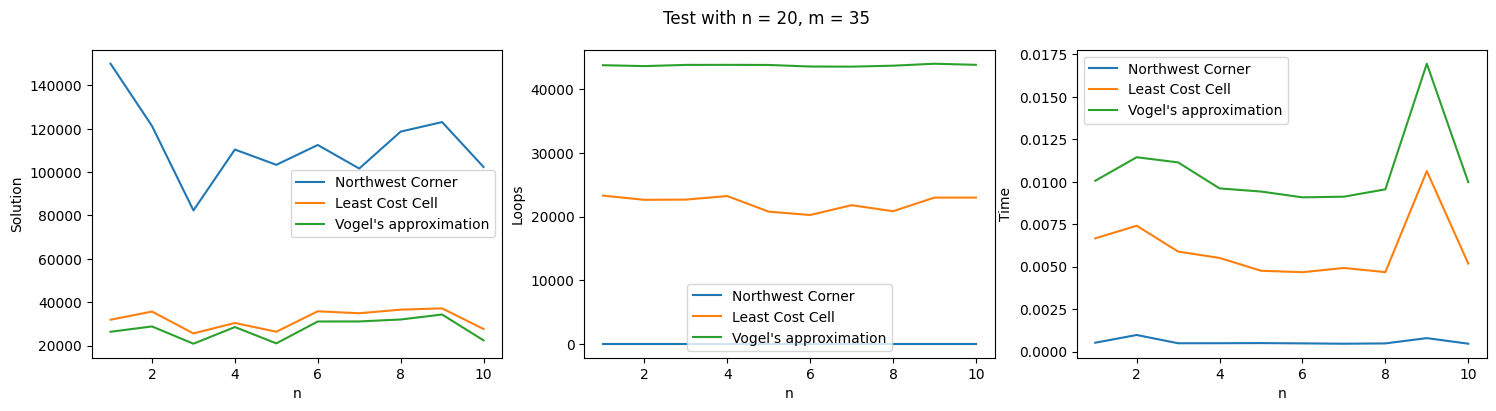

In [112]:
n_tests = 10
x = np.arange(1, n_tests + 1, 1)
y1 = []
y2 = []
y3 = []
z1 = []
z2 = []
z3 = []
t1 = []
t2 = []
t3 = []

n = 20
m = 35

i = 0
while i < n_tests:
    grid, supply, demand = generate_transport_problem(n, m, cost_lim=15)

    start = time.perf_counter()
    r1, loops_1 = northwest_corner(grid, supply, demand)
    end = time.perf_counter()
    time1 = end - start

    start = time.perf_counter()
    r2, loops_2 = least_cost_cell(grid, supply, demand)
    end = time.perf_counter()
    time2 = end - start

    start = time.perf_counter()
    r3, loops_3 = vogels_approximation(grid, supply, demand)
    end = time.perf_counter()
    time3 = end - start

    if r2 == 0 or r3 == 0:
        continue

    y1.append(r1)
    y2.append(r2)
    y3.append(r3)
    z1.append(loops_1)
    z2.append(loops_2)
    z3.append(loops_3)
    t1.append(time1)
    t2.append(time2)
    t3.append(time3)
    i += 1

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
fig.suptitle('Test with n = {}, m = {}'.format(n, m))

ax1.plot(x, y1, label="Northwest Corner")
ax1.plot(x, y2, label="Least Cost Cell")
ax1.plot(x, y3, label="Vogel's approximation")
ax1.set(xlabel='n', ylabel='Solution')
ax1.legend()

ax2.plot(x, z1, label="Northwest Corner")
ax2.plot(x, z2, label="Least Cost Cell")
ax2.plot(x, z3, label="Vogel's approximation")
ax2.set(xlabel='n', ylabel='Loops')
ax2.legend()

ax3.plot(x, t1, label="Northwest Corner")
ax3.plot(x, t2, label="Least Cost Cell")
ax3.plot(x, t3, label="Vogel's approximation")
ax3.set(xlabel='n', ylabel='Time')
ax3.legend()

plt.show()


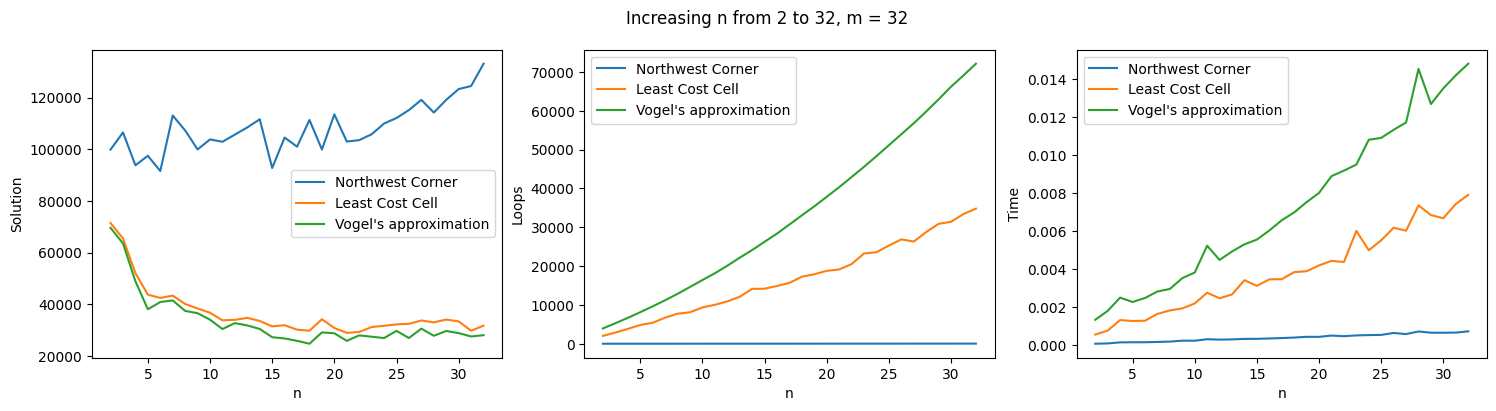

In [123]:
n_start = 2
n_end = 32
m = 32

x = np.arange(n_start, n_end + 1, 1)

y1 = []
y2 = []
y3 = []
z1 = []
z2 = []
z3 = []
t1 = []
t2 = []
t3 = []

for n in range(n_start, n_end + 1):
    n_tests = 5
    t_y1 = []
    t_y2 = []
    t_y3 = []
    t_z1 = []
    t_z2 = []
    t_z3 = []
    t_t1 = []
    t_t2 = []
    t_t3 = []

    i = 0
    while i < n_tests:
        grid, supply, demand = generate_transport_problem(n, m, cost_lim=15)

        start = time.perf_counter()
        r1, loops_1 = northwest_corner(grid, supply, demand)
        end = time.perf_counter()
        time1 = end - start

        start = time.perf_counter()
        r2, loops_2 = least_cost_cell(grid, supply, demand)
        end = time.perf_counter()
        time2 = end - start

        start = time.perf_counter()
        r3, loops_3 = vogels_approximation(grid, supply, demand)
        end = time.perf_counter()
        time3 = end - start

        if r2 == 0 or r3 == 0:
            continue

        t_y1.append(r1)
        t_y2.append(r2)
        t_y3.append(r3)
        t_z1.append(loops_1)
        t_z2.append(loops_2)
        t_z3.append(loops_3)
        t_t1.append(time1)
        t_t2.append(time2)
        t_t3.append(time3)
        i += 1
    y1.append(np.mean(t_y1))
    y2.append(np.mean(t_y2))
    y3.append(np.mean(t_y3))
    z1.append(np.mean(t_z1))
    z2.append(np.mean(t_z2))
    z3.append(np.mean(t_z3))
    t1.append(np.mean(t_t1))
    t2.append(np.mean(t_t2))
    t3.append(np.mean(t_t3))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
fig.suptitle('Increasing n from {} to {}, m = {}'.format(n_start, n_end, m))

ax1.plot(x, y1, label="Northwest Corner")
ax1.plot(x, y2, label="Least Cost Cell")
ax1.plot(x, y3, label="Vogel's approximation")
ax1.set(xlabel='n', ylabel='Solution')
ax1.legend()

ax2.plot(x, z1, label="Northwest Corner")
ax2.plot(x, z2, label="Least Cost Cell")
ax2.plot(x, z3, label="Vogel's approximation")
ax2.set(xlabel='n', ylabel='Loops')
ax2.legend()

ax3.plot(x, t1, label="Northwest Corner")
ax3.plot(x, t2, label="Least Cost Cell")
ax3.plot(x, t3, label="Vogel's approximation")
ax3.set(xlabel='n', ylabel='Time')
ax3.legend()

plt.show()


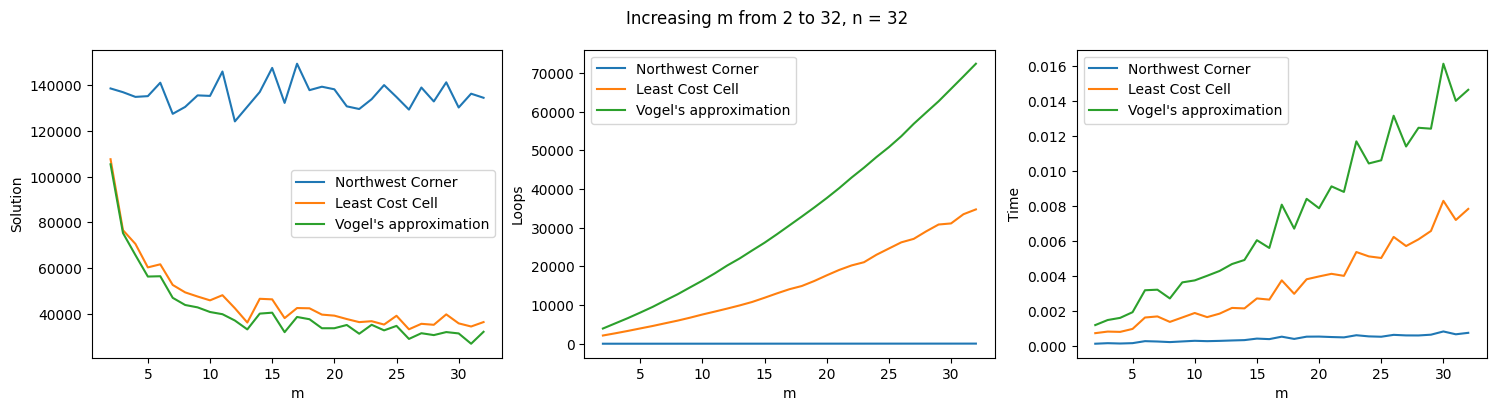

In [124]:
m_start = 2
m_end = 32
n = 32

x = np.arange(m_start, m_end + 1, 1)

y1 = []
y2 = []
y3 = []
z1 = []
z2 = []
z3 = []
t1 = []
t2 = []
t3 = []

for m in range(m_start, m_end + 1):
    n_tests = 5
    t_y1 = []
    t_y2 = []
    t_y3 = []
    t_z1 = []
    t_z2 = []
    t_z3 = []
    t_t1 = []
    t_t2 = []
    t_t3 = []

    i = 0
    while i < n_tests:
        grid, supply, demand = generate_transport_problem(n, m, cost_lim=15)

        start = time.perf_counter()
        r1, loops_1 = northwest_corner(grid, supply, demand)
        end = time.perf_counter()
        time1 = end - start

        start = time.perf_counter()
        r2, loops_2 = least_cost_cell(grid, supply, demand)
        end = time.perf_counter()
        time2 = end - start

        start = time.perf_counter()
        r3, loops_3 = vogels_approximation(grid, supply, demand)
        end = time.perf_counter()
        time3 = end - start

        if r2 == 0 or r3 == 0:
            continue

        t_y1.append(r1)
        t_y2.append(r2)
        t_y3.append(r3)
        t_z1.append(loops_1)
        t_z2.append(loops_2)
        t_z3.append(loops_3)
        t_t1.append(time1)
        t_t2.append(time2)
        t_t3.append(time3)
        i += 1
    y1.append(np.mean(t_y1))
    y2.append(np.mean(t_y2))
    y3.append(np.mean(t_y3))
    z1.append(np.mean(t_z1))
    z2.append(np.mean(t_z2))
    z3.append(np.mean(t_z3))
    t1.append(np.mean(t_t1))
    t2.append(np.mean(t_t2))
    t3.append(np.mean(t_t3))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
fig.suptitle('Increasing m from {} to {}, n = {}'.format(m_start, m_end, n))

ax1.plot(x, y1, label="Northwest Corner")
ax1.plot(x, y2, label="Least Cost Cell")
ax1.plot(x, y3, label="Vogel's approximation")
ax1.set(xlabel='m', ylabel='Solution')
ax1.legend()

ax2.plot(x, z1, label="Northwest Corner")
ax2.plot(x, z2, label="Least Cost Cell")
ax2.plot(x, z3, label="Vogel's approximation")
ax2.set(xlabel='m', ylabel='Loops')
ax2.legend()

ax3.plot(x, t1, label="Northwest Corner")
ax3.plot(x, t2, label="Least Cost Cell")
ax3.plot(x, t3, label="Vogel's approximation")
ax3.set(xlabel='m', ylabel='Time')
ax3.legend()

plt.show()


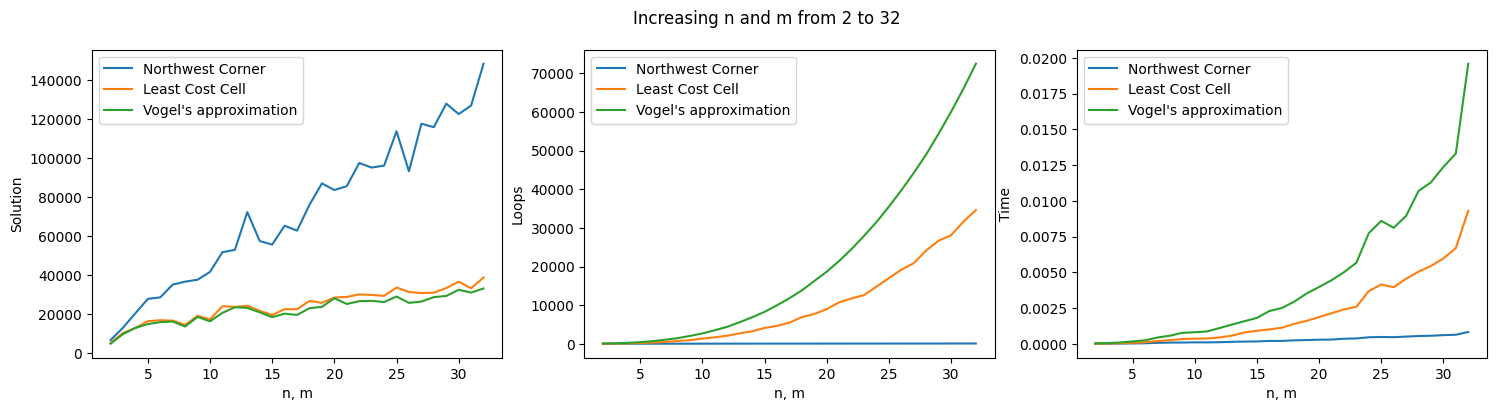

In [121]:
n_m_start = 2
n_m_end = 32

x = np.arange(n_m_start, n_m_end + 1, 1)

y1 = []
y2 = []
y3 = []
z1 = []
z2 = []
z3 = []
t1 = []
t2 = []
t3 = []

for n_m in range(n_m_start, n_m_end + 1):
    n_tests = 5
    t_y1 = []
    t_y2 = []
    t_y3 = []
    t_z1 = []
    t_z2 = []
    t_z3 = []
    t_t1 = []
    t_t2 = []
    t_t3 = []

    i = 0
    while i < n_tests:
        grid, supply, demand = generate_transport_problem(
            n_m, n_m, cost_lim=15)

        start = time.perf_counter()
        r1, loops_1 = northwest_corner(grid, supply, demand)
        end = time.perf_counter()
        time1 = end - start

        start = time.perf_counter()
        r2, loops_2 = least_cost_cell(grid, supply, demand)
        end = time.perf_counter()
        time2 = end - start

        start = time.perf_counter()
        r3, loops_3 = vogels_approximation(grid, supply, demand)
        end = time.perf_counter()
        time3 = end - start

        if r2 == 0 or r3 == 0:
            continue

        t_y1.append(r1)
        t_y2.append(r2)
        t_y3.append(r3)
        t_z1.append(loops_1)
        t_z2.append(loops_2)
        t_z3.append(loops_3)
        t_t1.append(time1)
        t_t2.append(time2)
        t_t3.append(time3)
        i += 1
    y1.append(np.mean(t_y1))
    y2.append(np.mean(t_y2))
    y3.append(np.mean(t_y3))
    z1.append(np.mean(t_z1))
    z2.append(np.mean(t_z2))
    z3.append(np.mean(t_z3))
    t1.append(np.mean(t_t1))
    t2.append(np.mean(t_t2))
    t3.append(np.mean(t_t3))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
fig.suptitle('Increasing n and m from {} to {}'.format(n_m_start, n_m_end))

ax1.plot(x, y1, label="Northwest Corner")
ax1.plot(x, y2, label="Least Cost Cell")
ax1.plot(x, y3, label="Vogel's approximation")
ax1.set(xlabel='n, m', ylabel='Solution')
ax1.legend()

ax2.plot(x, z1, label="Northwest Corner")
ax2.plot(x, z2, label="Least Cost Cell")
ax2.plot(x, z3, label="Vogel's approximation")
ax2.set(xlabel='n, m', ylabel='Loops')
ax2.legend()

ax3.plot(x, t1, label="Northwest Corner")
ax3.plot(x, t2, label="Least Cost Cell")
ax3.plot(x, t3, label="Vogel's approximation")
ax3.set(xlabel='n, m', ylabel='Time')
ax3.legend()

plt.show()


In [8]:
n_m_start = 2
n_m_end = 40

x = np.arange(n_m_start, n_m_end + 1, 10)

m1 = []
m2 = []
m3 = []


for n_m in range(n_m_start, n_m_end + 1, 10):
    n_tests = 3

    t_m1 = []
    t_m2 = []
    t_m3 = []

    i = 0
    while i < n_tests:
        grid, supply, demand = generate_transport_problem(
            n_m, n_m, cost_lim=15)

        m = []

        r1, loops_1, mem1 = northwest_corner(grid, supply, demand)
        m.append(mem1)

        r2, loops_2, mem2 = least_cost_cell(grid, supply, demand)
        m.append(mem2)

        r3, loops_3, mem3 = vogels_approximation(grid, supply, demand)
        m.append(mem3)

        if r2 == 0 or r3 == 0:
            continue

        print(m)

        t_m1.append(m[0])
        t_m2.append(m[1])
        t_m3.append(m[2])
        i += 1

    m1.append(np.mean(t_m1))
    m2.append(np.mean(t_m2))
    m3.append(np.mean(t_m3))

plt.figure(figsize=(8, 6))
plt.title('Increasing n and m from {} to {}'.format(n_m_start, n_m_end))

plt.plot(x, m1, label="Northwest Corner")
plt.plot(x, m2, label="Least Cost Cell")
plt.plot(x, m3, label="Vogel's approximation")
plt.xlabel('n, m')
plt.ylabel('Memory, bytes')
plt.legend()

plt.show()


[112, 232, 540]
[84, 204, 484]
[140, 232, 624]
[392, 648, 2304]


ValueError: not enough values to unpack (expected 3, got 2)